# Class 17: Dynamics on Networks 2 — Compartmental Models

Goal of today's class:
1. Adapt our notion of dynamics on networks to spreading models
2. Define compartmental models (SI, SIS, SIR)
3. Explore core results in spreading models on networks

*Acknowledgement: Some of the material in this lesson is based on a previous course offered by Matteo Chinazzi and Qian Zhang.*
__________

1. Come in. Sit down. Open Teams.
2. Make sure your notebook from last class is saved.
3. Open up the Jupyter Lab server.
4. Open up the Jupyter Lab terminal.
5. Activate Conda: `module load anaconda3/2022.05`
6. Activate the shared virtual environment: `source activate /courses/PHYS7332.202510/shared/phys7332-env/`
7. Run `python3 git_fixer2.py`
8. Github:
    - git status (figure out what files have changed)
    - git add ... (add the file that you changed, aka the `_MODIFIED` one(s))
    - git commit -m "your changes"
    - git push origin main
________

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', axisbelow=True)
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

## Mathematical Models of Epidemic Spreading

As we learned last class, we can model dynamical processes on networks in a wide variety of contexts in complex systems science. One area where Network Science has has the most success in application is in **epidemic dynamics**, which stand out due to their relevance in public health, ecology, and sociotechnical systems. Networks serve as natural substrates for modeling the spread of infectious diseases, as they capture the underlying structure of interactions---whether physical, social, or digital—through which contagion propagates.


    "I simply wish that, in a matter which so closely concerns the wellbeing of the human race, no decision shall be made without all the knowledge which a little analysis and calculation can provide."

        - Daniel Bernoulli (1760)

![](images/bernoulli.png)

*From: Dietz, K. & Heesterbeek, J. Bernoulli was ahead of modern epidemiology. *Nature* 408, 513–514 (2000).* https://doi.org/10.1038/35046270

Daniel Bernoulli is often credited for his 1760 observation about the potential effectiveness of smallpox inoculation for reducing risk of death. This led to one (of many) scientific argument between Bernoulli and Jean Le Rond d'Alembert in the late 1700s. Today, we see Bernoulli's work as one of the first mathematical models in epidemiology (followed, in some sense, by Kermack and McKendrick, nearly 200 years later in 1927).

___________

## Spreading Models: What are they, how do they work, why do we use them?

At the heart of epidemic dynamics are **compartmental models**, which classify individuals into states such as susceptible (S), infected (I), and recovered (R) (hospitalized, latent, exposed, quarantined, etc. etc.), allowing us to model a range of characteristic heterogeneities in individual behavior. By combining these models with network structures, we gain insights into how local interactions influence global phenomena, such as outbreak size, speed of spread, and the effectiveness of interventions.

This chapter introduces key concepts in epidemic dynamics on networks, starting with a review of **basic compartmental models (SIR, SIS, SEIR)**. We then explore how these models are adapted to networked settings, focusing on (if time):

1. **The role of network topology**: How properties such as degree distribution, clustering, and community structure impact disease dynamics.
2. **Threshold phenomena**: Conditions under which an epidemic transitions from local containment to widespread outbreak.
3. **Dynamical measures**: Metrics such as the basic reproduction number \(R_0\), network transmissibility, and epidemic size.
4. **Intervention strategies**: The effects of targeted vaccination, quarantine, and network rewiring on mitigating disease spread.

**Central questions to answer:**
- How do contagions spread in populations?
- Will a disease become an epidemic?
- Who are the best people to vaccinate?


Some important references from the article above:
1. Dietz, K. & Heesterbeek, J. Bernoulli was ahead of modern epidemiology. *Nature* 408, 513–514 (2000). https://doi.org/10.1038/35046270
2. Bernoulli, D. Mém. Math. Phys. Acad. R. Sci. Paris 1–45 (1766); English translation by Bradley, L. in *Smallpox Inoculation: An Eighteenth Century Mathematical Controversy (Adult Education Department, Nottingham, 1971)*.
3. Anderson, R. M. & May, R. M. Infectious Diseases of Humans — *Dynamics and Control* (Oxford University Press, Oxford, 1991).
4. Dietz, K. *Stat. Meth. Med. Res.* 2, 23–41 (1993).
5. D’Alembert, J. Opuscules Mathématiques, t. II (Paris, David, 1761).
6. Kermack William Ogilvy & McKendrick A.G. (1927). A contribution to the mathematical theory of epidemics. *Proc. R. Soc. Lond.* A115700–721 http://doi.org/10.1098/rspa.1927.0118.
______

### Basic Component of Compartmental Models

#### I. Individuals in are grouped by  disease status:

- [**S**] -- Susceptible
    - Individuals who have not yet been exposed to the disease but are at risk of becoming infected if they come into contact with an infectious individual.
- [**I**] -- Infectious
    - Individuals in this compartment are actively infected and capable of transmitting the disease to susceptible individuals.
- [**R**] -- Recovered (or Removed)
    - Individuals who have recovered from the disease and are assumed to be immune to future infections.
- And many others, depending on the disease dynamics in question (e.g. **V**accinated, **Q**uarantined, **H**ospitalized, **L**atent, **A**symptomatic, etc.)

*Note: Typically we assume constant population (e.g., $N = S+I+R$) in these models.*

#### II. Transition between compartments:

Two main types:
1. Transitions that are based on "interaction" (i.e., "contagion")
- Susceptibles individuals become infectious by interacting with infectious (S + I -> 2I)
    
2. Transitions that are "spontaneous"
- Infectious individuals can become recovered on their own (i.e., no interaction; I -> R)

#### III. The dynamical process itself

Intuitively this should be a function of:
- The number of infected individuals in the population
- The probability of infection given an infected contact 
- The number of contacts with infectious individuals

#### IV. Mixing Method: Homogeneous, Heterogeneous, etc.

In the **homogeneous mixing** case, we assume a fully "mixed" population (good approximation for some diseases), where every individual in the population has an equal chance of coming into contact with others. The *force of infection* ($\lambda$) is the per capita rate at which susceptible individuals acquire an infectious disease: $\lambda = \dfrac{\mathrm{the\; number\; of\; infections}}{\mathrm{the\; number\; of\; susceptible\; person\; exposed}\times\mathrm{duration\; of\; exposed}}$.
    
In this case, infection follows a *mass-action law*. Suppose $N$ is the total population, $I$ is the number of infections, $\beta$ is the transmission rate ($\beta^{-1}$ the period of infection); in this case, the force of infection $\lambda = \beta\dfrac{I}{N}$.
    
In **heterogeneous mixing**, the well-mixed approximation becomes relaxed, and we consider explicitly the connectivity prescribed by a network, $G$. Here, we assume a *degree-class approximation* (sometimes described as an *annealed* approximation).

## [SI] Susceptible-Infectious Dynamics
This is probably the simplest model of disease dynamics, where infection is permanent.

![](images/compartments_SI.png)

In a homogeneous population:

$
\begin{align*}
S(t+dt) \; =& \; S(t) - \beta S(t)\frac{I(t)}{N}dt \\
I(t+dt) \; =& \; I(t) + \beta S(t)\frac{I(t)}{N}dt \\
\end{align*}
$

**Notes:**
* $\frac{S}{N}$ is the probability of meeting a susceptible individual per unit time

* $\frac{IS}{N}$ is the average number of susceptibles that infected individuals meet per unit time

* $\beta\frac{IS}{N}$ is the average number of susceptibles that become infected per unit time

In the continuous limit $dt \rightarrow 0$,

$
\begin{align*}
d_t S \; =& \; -\beta S \frac{I}{N} \quad d_t s \; = \; -\beta s i \quad s \; = \; \frac{S}{N} \\
d_t I \; =& \; \beta S\frac{I}{N} \qquad d_t i \; = \; \beta s i \qquad i \; = \; \frac{I}{N} \\
\end{align*}
$

with $ s = 1 - i $. We have,

$di = \beta i(1-i) dt$ and 

$\int_{i_0}^{i} \frac{di'}{i' (1-i')} = \beta\int_{t_0}^{t} dt$.

So the analytical solution is: $i(t) = \frac{1}{1 + (1-i_0) e^{-\beta t}}$ as $t\rightarrow\infty$, and

$i(\infty)\rightarrow 1 \qquad s(\infty)\rightarrow 0$.

_________

### [SIS] Susceptible-Infectious-Susceptible Dynamics
SIS dynamics adds a "recovery" process, but there is no permanent immunization.

![](images/compartments_SIS.png)

#### SIS in Homogeneous Populations

$
\begin{align*}
S(t+dt) \; =& \; S(t) - \beta S(t)\frac{I(t)}{N}dt + \mu I(t)dt\\
I(t+dt) \; =& \; I(t) + \beta S(t)\frac{I(t)}{N}dt - \mu I(t)dt \\
\end{align*}
$

or equivalently,

$
\begin{align*}
d_t s(t) \; =& \; - \beta s(t)i(t) + \mu i(t)\\
d_t i(t) \; =& \; \beta s(t)i(t) - \mu i(t) \\
\end{align*}
$

In early time dynamics, the number of infectious individuals is small with respect to the population size ($s \sim 1$) (which makes sense). We can therefore linearize the equation $d_{t} i = \beta i - \mu i = (\beta - \mu) i$.

We therefore have **epidemic threshold** $\beta - \mu > 0$  or $\dfrac{\beta}{\mu}>1$.

#### Basic Reproductive Number, $R_0$
The basic reproductive number, $R_0$ is a central concept in epidemiology; it is the average number of secondary infections generated by a initial infection in a fully uninfected population. Its precise form depends on the epidemic dynamics themselves (i.e., for the SIS model, $R_0 = \dfrac{\beta}{\mu}$).

The analytical solution: $i(t) = \dfrac{\beta - \mu}{\beta + c e^{-\mu(R_0 -1)t}}$.

If $R_0<1$, $i(\infty) = 0$.

If $R_0>1$, $i(\infty) = 1 - \dfrac{1}{R_0}$, which is an endemic state.

____________

In [50]:
def deterministic_epidemic_sis(N, S_o, I_o, beta, mu, T):
    """
    Simulates a deterministic epidemic model using the SIS
    (Susceptible-Infected-Recovered) framework.

    Parameters:
    N (int): Total population size, assumed to be constant throughout the simulation.
    S_o (int): Initial number of susceptible individuals.
    I_o (int): Initial number of infected individuals.
    beta (float): Transmission rate of the infection.
    mu (float): Recovery rate of the infection.
    T (int): Total time steps for the simulation.

    Returns:
    tuple of lists: Three lists representing the number of Susceptible (S),
                    Infected (I) individuals at each time step over the
                    course of the simulation.

    If `beta` or `mu` are not provided as floats, they are converted to floats.

    Example:
        N = 1000
        S_o = 990
        I_o = 10
        beta = 0.3
        mu = 0.1
        T = 100
        S, I = deterministic_epidemic_sis(N, S_o, I_o, beta, mu, T)
    """

    # Ensure beta and mu are floats for consistency in calculations
    if type(beta) != float:
        beta = float(beta)
    if type(mu) != float:
        mu = float(mu)

    # Initialize time step counter
    t = 0

    # Initialize lists for storing the S, I, R values at each time step
    S = [S_o]*T # Susceptible population over time
    I = [I_o]*T # Infected population over time
       
    # Iterate through each time step
    while t < T-1:
        # Update the susceptible population based on the SIR model
        S[t+1] = S[t] - beta*S[t] * I[t]/N + mu*I[t]

        # Update the infected population based on new infections and recoveries
        I[t+1] = I[t] - mu*I[t] + beta*S[t] * I[t]/N

        # Move to the next time step
        t += 1


    return S, I

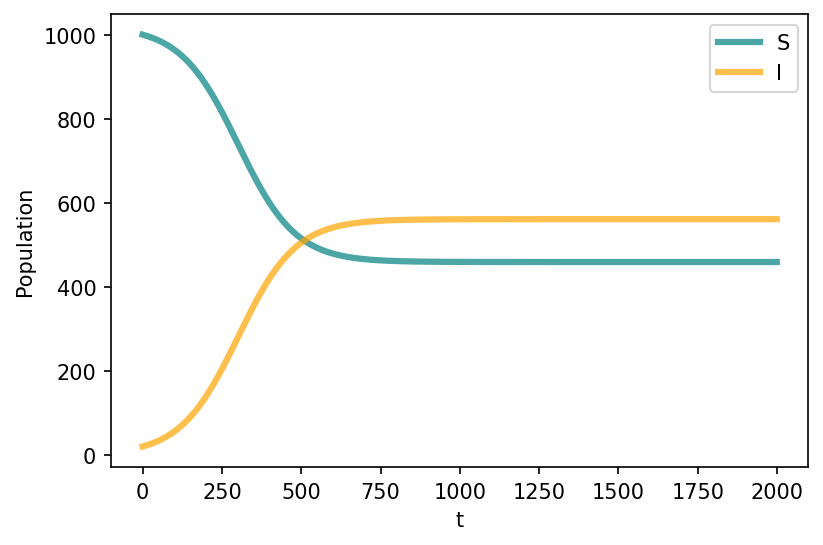

In [52]:
S_o = 1000
I_o = 20
N = S_o + I_o
beta = 0.02
mu = 0.009
T = 2000

S,I = deterministic_epidemic_sis(N, S_o, I_o, beta, mu, T)


fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.plot(range(T), S, c="teal", lw=3, alpha=0.7, label='S') 
ax.plot(range(T), I, c="orange", lw=3, alpha=0.7, label='I') 

ax.set_xlabel('t')
ax.set_ylabel('Population')
ax.legend()

plt.show() 

In [56]:
def stochastic_epidemic_sis(N, S_o, I_o, beta, mu, T):
    """
    Simulates a deterministic epidemic model using the SIR
    (Susceptible-Infected-Recovered) framework.

    Parameters:
    N (int): Total population size, assumed to be constant throughout the simulation.
    S_o (int): Initial number of susceptible individuals.
    I_o (int): Initial number of infected individuals.
    beta (float): Transmission rate of the infection.
    mu (float): Recovery rate of the infection.
    T (int): Total time steps for the simulation.

    Returns:
    tuple of lists: Three lists representing the number of Susceptible (S),
                    Infected (I), and Recovered/Removed (R) individuals 
                    at each time step over the course of the simulation.

    The function iteratively updates the S, I, and R compartments at each timestep
    using the SIR model equations:
        - S(t+1) = S(t) - beta * S(t) * I(t) / N
        - I(t+1) = I(t) + beta * S(t) * I(t) / N - mu * I(t)
        - R(t+1) = R(t) + mu * I(t)

    If `beta` or `mu` are not provided as floats, they are converted to floats.

    Example:
        N = 1000
        S_o = 990
        I_o = 10
        beta = 0.3
        mu = 0.1
        T = 100
        S, I, R = deterministic_epidemic(N, S_o, I_o, beta, mu, T)
    """

    # Ensure beta and mu are floats for consistency in calculations
    if type(beta) != float:
        beta = float(beta)
    if type(mu) != float:
        mu = float(mu)

    # Initialize time step counter
    t = 0

    # Initialize lists for storing the S, I, R values at each time step
    S = [S_o]*T # Susceptible population over time
    I = [I_o]*T # Infected population over time
       
    # Iterate through each time step
    while t < T-1:
        force_of_inf = beta * I[t] / N

        # Sample transitions from susceptible to infectious
        S_out = np.random.binomial(S[t], force_of_inf)

        # Sample transitions from infectious to susceptible
        I_out = np.random.binomial(I[t], mu)
        
        # Update the susceptible population based on the SIR model
        S[t+1] = S[t] - S_out + I_out

        # Update the infected population based on new infections and recoveries
        I[t+1] = I[t] - I_out + S_out

        # Move to the next time step
        t += 1


    return S, I

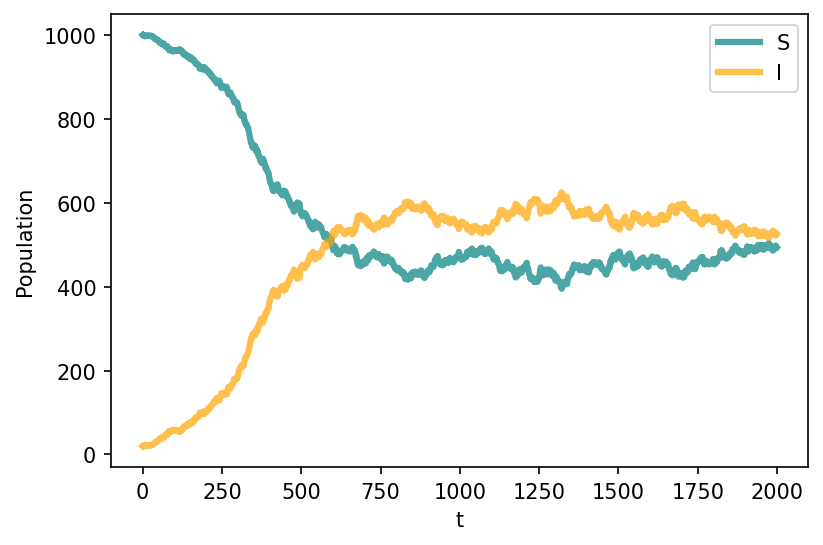

In [57]:
S_o = 1000
I_o = 20
N = S_o + I_o
beta = 0.02
mu = 0.009
T = 2000

S,I = stochastic_epidemic_sis(N, S_o, I_o, beta, mu, T)


fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.plot(range(T), S, c="teal", lw=3, alpha=0.7, label='S') 
ax.plot(range(T), I, c="orange", lw=3, alpha=0.7, label='I') 

ax.set_xlabel('t')
ax.set_ylabel('Population')
ax.legend()

plt.show() 

_________

### [SIR] Susceptible-Infectious-Recovered Dynamics
In SIR dynamics, we add a recovery (R) compartment, which draws individuals from the infectious (I) compartment, making them ineligible for future infection (i.e., permanently immunized).

![](images/compartments_SIR.png)


### SIR model in homogeneous population
$
\begin{align*}
d_t s(t) \; =& \; - \beta s(t)i(t) \\
d_t i(t) \; =& \; \beta s(t)i(t) - \mu i(t) \\
d_t r(t) \; =& \; \mu i(t)
\end{align*}
$

**Assumptions:** In the early time dynamics,
- the number of infectious is small respect to the population size ($s \sim 1$, $i \sim 0$)
- we can linearize the equation $d_{i}t = \beta i - \mu i = (\beta - \mu) i$
- so we have an **epidemic threshold** $\beta - \mu > 0$ or $R_0=\frac{\beta}{\mu}>1$

In [58]:
def deterministic_epidemic_sir(N, S_o, I_o, beta, mu, T):
    """
    Simulates a deterministic epidemic model using the SIR
    (Susceptible-Infected-Recovered) framework.

    Parameters:
    N (int): Total population size, assumed to be constant throughout the simulation.
    S_o (int): Initial number of susceptible individuals.
    I_o (int): Initial number of infected individuals.
    beta (float): Transmission rate of the infection.
    mu (float): Recovery rate of the infection.
    T (int): Total time steps for the simulation.

    Returns:
    tuple of lists: Three lists representing the number of Susceptible (S),
                    Infected (I), and Recovered/Removed (R) individuals 
                    at each time step over the course of the simulation.

    The function iteratively updates the S, I, and R compartments at each timestep
    using the SIR model equations:
        - S(t+1) = S(t) - beta * S(t) * I(t) / N
        - I(t+1) = I(t) + beta * S(t) * I(t) / N - mu * I(t)
        - R(t+1) = R(t) + mu * I(t)

    If `beta` or `mu` are not provided as floats, they are converted to floats.

    Example:
        N = 1000
        S_o = 990
        I_o = 10
        beta = 0.3
        mu = 0.1
        T = 100
        S, I, R = deterministic_epidemic(N, S_o, I_o, beta, mu, T)
    """

    # Ensure beta and mu are floats for consistency in calculations
    if type(beta) != float:
        beta = float(beta)
    if type(mu) != float:
        mu = float(mu)

    # Initialize time step counter
    t = 0

    # Initialize lists for storing the S, I, R values at each time step
    S = [S_o]*T # Susceptible population over time
    I = [I_o]*T # Infected population over time
    R = [(N - S_o - I_o)]*T # Recovered population over time
       
    # Iterate through each time step
    while t < T-1:
        # Update the susceptible population based on the SIR model
        S[t+1] = S[t] - beta*S[t] * I[t]/N

        # Update the infected population based on new infections and recoveries
        I[t+1] = I[t] - mu*I[t] + beta*S[t] * I[t]/N

        # Update the recovered population based on the recovery rate
        R[t+1] = R[t] + mu*I[t]

        # Move to the next time step
        t += 1


    return S, I, R

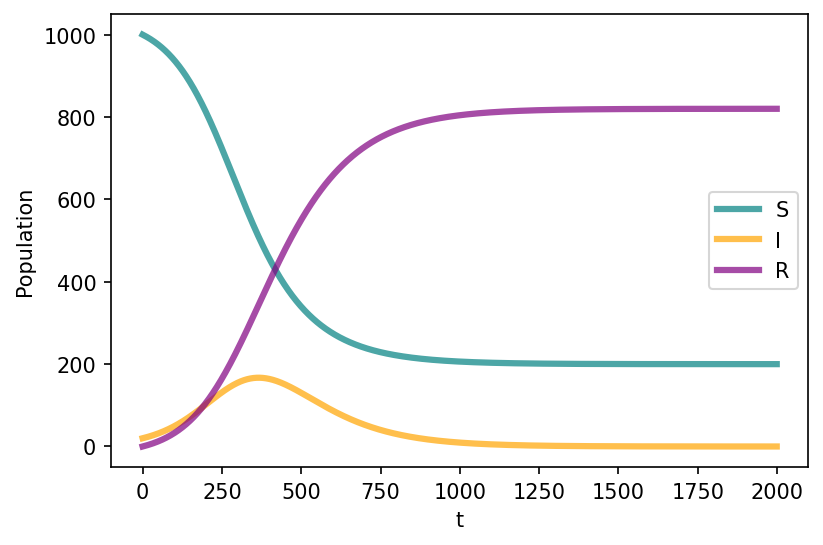

In [59]:
S_o = 1000
I_o = 20
R_o = 0
N = S_o + I_o + R_o
beta = 0.02
mu = 0.01
T = 2000

S,I,R = deterministic_epidemic_sir(N, S_o, I_o, beta, mu, T)


fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.plot(range(T), S, c="teal", lw=3, alpha=0.7, label='S') 
ax.plot(range(T), I, c="orange", lw=3, alpha=0.7, label='I') 
ax.plot(range(T), R, c="purple", lw=3, alpha=0.7, label='R') 

ax.set_xlabel('t')
ax.set_ylabel('Population')
ax.legend()

plt.show() 

### [SEIR] Susceptible-Exposed-Infectious-Recovered Dynamics
In SEIR dynamics, we add an exposed (E) compartment, which draws individuals from the susceptible (S) compartment via interaction with infectious compartment, then leading to a spontaneous transition to infectious (I) with probability $\epsilon$.

![](images/compartments_SEIR.png)


### SIR model in homogeneous population
$
\begin{align*}
d_t s(t) \; =& \; - \beta s(t)i(t) \\
d_t i(t) \; =& \; \beta s(t)i(t) - \mu i(t) \\
d_t r(t) \; =& \; \mu i(t)
\end{align*}
$

**Assumptions:** In the early time dynamics,
- the number of infectious is small respect to the population size ($s \sim 1$, $i \sim 0$)
- we can linearize the equation $d_{i}t = \beta i - \mu i = (\beta - \mu) i$
- so we have an **epidemic threshold** $\beta - \mu > 0$ or $R_0=\frac{\beta}{\mu}>1$

In [61]:
def deterministic_epidemic_seir(N, S_o, E_o, I_o, beta, mu, epsi, T):
    """
    Simulates a deterministic epidemic model using the SEIR
    (Susceptible-Infected-Recovered) framework.

    Parameters:
    N (int): Total population size, assumed to be constant throughout the simulation.
    S_o (int): Initial number of susceptible individuals.
    E_o (int): Initial number of exposed individuals.
    I_o (int): Initial number of infected individuals.
    beta (float): Transmission rate of the infection.
    mu (float): Recovery rate of the infection.
    epsi (float): Transition from exposed to infectious.
    T (int): Total time steps for the simulation.

    Returns:
    tuple of lists: Four lists representing the number of Susceptible (S),
                    Exposed (E), Infected (I), and Recovered/Removed (R) individuals 
                    at each time step over the course of the simulation.

    The function iteratively updates the S, I, and R compartments at each timestep
    using the SIR model equations:
        - S(t+1) = S(t) - beta * S(t) * I(t) / N
        - E(t+1) = S(t) + beta * S(t) * I(t) / N - mu * I(t)
        - I(t+1) = I(t) + epsilon * E(t) - mu * I(t)
        - R(t+1) = R(t) + mu * I(t)

    If `beta` or `mu` or `epsil` are not provided as floats, they are converted to floats.

    Example:
        N = 1000
        S_o = 980
        E_o = 10
        I_o = 10
        beta = 0.2
        mu = 0.01
        epsi = 0.03
        T = 2000
        S, E, I, R = deterministic_epidemic(N, S_o, E_o, I_o, beta, mu, epsi, T)
    """

    # Ensure beta and mu and epsi are floats for consistency in calculations
    if type(beta) != float:
        beta = float(beta)
    if type(mu) != float:
        mu = float(mu)
    if type(epsi) != float:
        epsi = float(epsi)

    # Initialize time step counter
    t = 0

    # Initialize lists for storing the S, I, R values at each time step
    S = [S_o]*T # Susceptible population over time
    E = [E_o]*T # Exposed population over time
    I = [I_o]*T # Infected population over time
    R = [(N - S_o - E_o - I_o)]*T # Recovered population over time
       
    # Iterate through each time step
    while t < T-1:
        # Update the susceptible population based on the SIR model
        S[t+1] = S[t] - beta*S[t] * I[t]/N

        # Update the infected population based on new infections and recoveries
        E[t+1] = E[t] - epsi*E[t] + beta*S[t]*I[t]/N

        # Update the infected population based on new infections and recoveries
        I[t+1] = I[t] - mu*I[t] + epsi*E[t]

        # Update the recovered population based on the recovery rate
        R[t+1] = R[t] + mu*I[t]

        # Move to the next time step
        t += 1


    return S, E, I, R

In [62]:
def stochastic_epidemic_seir(N, S_o, E_o, I_o, beta, mu, epsi, T):
    """
    Simulates a stochastic epidemic model using the SEIR
    (Susceptible-Exposed-Infected-Recovered) framework.

    Parameters:
    N (int): Total population size, assumed to be constant throughout the simulation.
    S_o (int): Initial number of susceptible individuals.
    E_o (int): Initial number of exposed (but not yet infectious) individuals.
    I_o (int): Initial number of infected individuals.
    beta (float): Transmission rate of the infection.
    mu (float): Recovery rate of the infection.
    epsi (float): Rate at which exposed individuals become infectious.
    T (int): Total time steps for the simulation.

    Returns:
    tuple of lists: Four lists representing the number of Susceptible (S),
                    Exposed (E), Infected (I), and Recovered (R) 
                    individuals at each time step over the course of
                    the simulation.

    The function iteratively updates the S, E, I, and R compartments at each
    time step using a stochastic approach based on the SEIR model:
        - S -> E: New exposures occur with probability based on the
                  transmission rate and current infected count.
        - E -> I: Exposed individuals become infectious at a rate `epsi`.
        - I -> R: Infected individuals recover at a rate `mu`.

    Example:
        N = 1000
        S_o = 990
        E_o = 5
        I_o = 5
        beta = 0.3
        mu = 0.1
        epsi = 0.2
        T = 100
        S, E, I, R = stochastic_epidemic(N, S_o, E_o, I_o, beta, mu, epsi, T)
    """
    
    # Ensure beta, mu, and epsi are floats for consistency in calculations
    if type(beta) != float:
        beta = float(beta)
    if type(mu) != float:
        mu = float(mu)
    if type(epsi) != float:
        epsi = float(epsi)

    # Initialize time step counter
    t = 0

    # Initialize lists for storing the S, E, I, and R values at each time step
    S = [S_o] * T  # Susceptible population over time
    E = [E_o] * T  # Exposed (latent) population over time
    I = [I_o] * T  # Infected population over time
    R = [(N - S_o - I_o - E_o)] * T  # Recovered population over time

    # Iterate through each time step
    while t < T - 1:
        # Calculate force of infection: the probability an S individual becomes exposed
        force_of_inf = beta * I[t] / N

        # Sample new infections from susceptible population
        S_out = np.random.binomial(S[t], force_of_inf)

        # Sample transitions from exposed to infected
        E_out = np.random.binomial(E[t], epsi)

        # Sample transitions from infected to recovered
        I_out = np.random.binomial(I[t], mu)

        # Update compartment counts based on transitions
        S[t + 1] = S[t] - S_out  # Susceptibles decrease by new exposures
        E[t + 1] = E[t] - E_out + S_out  # Exposed increase by new exposures, decrease by new infections
        I[t + 1] = I[t] - I_out + E_out  # Infected increase by new infections, decrease by recoveries
        R[t + 1] = R[t] + I_out  # Recovered increase by new recoveries
        
        # Move to the next time step
        t += 1
    
    # Return the lists containing the S, E, I, and R values for each time step
    return S, E, I, R


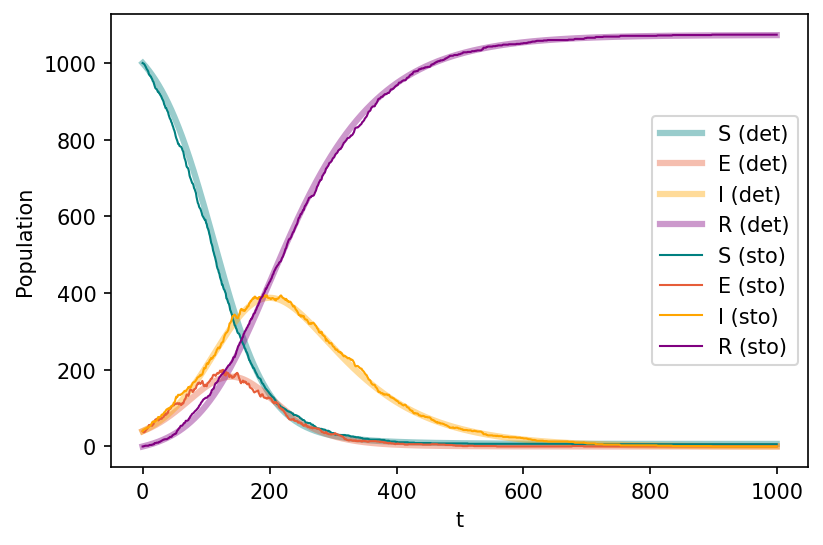

In [63]:
S_o = 1000
E_o = 40
I_o = 40
R_o = 0
N = S_o + E_o + I_o + R_o
beta = 0.05
mu = 0.01
epsi = 0.03
T = 1000

Sd,Ed,Id,Rd = deterministic_epidemic_seir(N, S_o, E_o, I_o, beta, mu, epsi, T)
Ss,Es,Is,Rs = stochastic_epidemic_seir(   N, S_o, E_o, I_o, beta, mu, epsi, T)


fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)
ax.plot(range(T), Sd, c="teal", lw=3, alpha=0.4, label='S (det)')
ax.plot(range(T), Ed, c="#E65D39", lw=3, alpha=0.4, label='E (det)') 
ax.plot(range(T), Id, c="orange", lw=3, alpha=0.4, label='I (det)') 
ax.plot(range(T), Rd, c="purple", lw=3, alpha=0.4, label='R (det)') 
ax.plot(range(T), Ss, c="teal", lw=1, label='S (sto)') 
ax.plot(range(T), Es, c="#E65D39", lw=1, label='E (sto)') 
ax.plot(range(T), Is, c="orange", lw=1, label='I (sto)') 
ax.plot(range(T), Rs, c="purple", lw=1, label='R (sto)') 

ax.set_xlabel('t')
ax.set_ylabel('Population')
ax.legend()

plt.show() 

Compartmental models can get (and most today are!) much more complicated as more and more details are learned about the epidemic.
![](images/complicated_compartment.png)
_________

## Rethinking our code...

In [2]:
susceptible_compartment = 'S'
infectious_compartment = 'I'

compartments = {
                'S':[],
                'I':[]
                }

transmissions = {
                 'S':['I', 'contagion', 'beta']
                }

params = {
          'beta': 0.02
         }

In [3]:
N = 1000
seed_num = 5
T = 500

# initialize
for cmpt in compartments.keys():
    if cmpt == susceptible_compartment:
        compartments[cmpt].append(N - seed_num)
    elif cmpt == infectious_compartment:
        compartments[cmpt].append(seed_num)
    else:
        compartments[cmpt].append(0)

In [4]:
# run for T timesteps
for t in range(1, T):
    for cmpt_from, (cmpt_to, tranmission_type, tranmission_rate_str) in transmissions.items():
        if tranmission_type == 'contagion':
            
            prob = params[tranmission_rate_str] * compartments[cmpt_to][t - 1] / N
            
            delta = np.random.binomial(compartments[cmpt_from][t-1], prob)

            compartments[cmpt_from].append(compartments[cmpt_from][t-1] - delta)
            compartments[cmpt_to].append(compartments[cmpt_to][t-1] + delta)

In [5]:
compartments_si = compartments.copy()

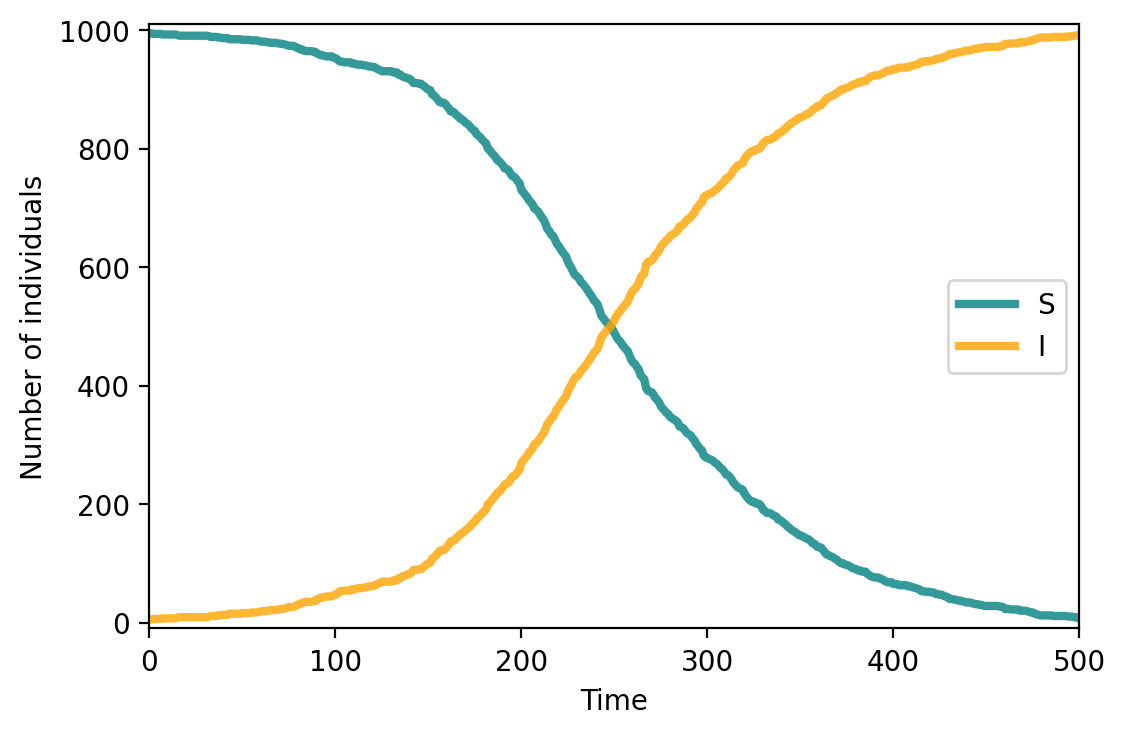

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=200)

ax.plot(range(T), compartments['S'], c="teal", lw=3, alpha=0.8, label = 'S') 
ax.plot(range(T), compartments['I'], c="orange", lw=3, alpha=0.8, label = 'I')
ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_ylim(-10,1010)
ax.set_xlim(0, T)
ax.legend()


plt.show() 

In [64]:
# let's define the model
susceptible_compartment = 'S'
infectious_compartment = 'I'

compartments = {
                'S':[],
                'I':[]
                }

transmissions = {
                'S' : ('I', 'contagion', 'beta'),
                'I' : ('S', 'spontaneous', 'mu') 
                }

params = {
         'beta' : 0.2,
         'mu' : 0.1
         }

In [65]:
N = 1000
seed_num = 5
T = 500

# initialize
for cmpt in compartments.keys():
    if cmpt == susceptible_compartment:
        compartments[cmpt].append(N - seed_num)
    elif cmpt == infectious_compartment:
        compartments[cmpt].append(seed_num)
    else:
        compartments[cmpt].append(0)

In [66]:
for t in range(1, T):
    for cmpt in compartments.keys():
        compartments[cmpt].append(compartments[cmpt][t - 1])

    for cmpt_from, (cmpt_to, tr_type, tr_rate_str) in transmissions.items():
        if tr_type == 'contagion':
            prob = params[tr_rate_str] * compartments[cmpt_to][t-1] / float(N)
        else: #for spontaneous transition
            prob = params[tr_rate_str]

        delta = np.random.binomial(compartments[cmpt_from][t-1], prob)

        compartments[cmpt_from][t] -= delta
        compartments[cmpt_to][t] += delta

In [67]:
compartments_sis = compartments.copy()

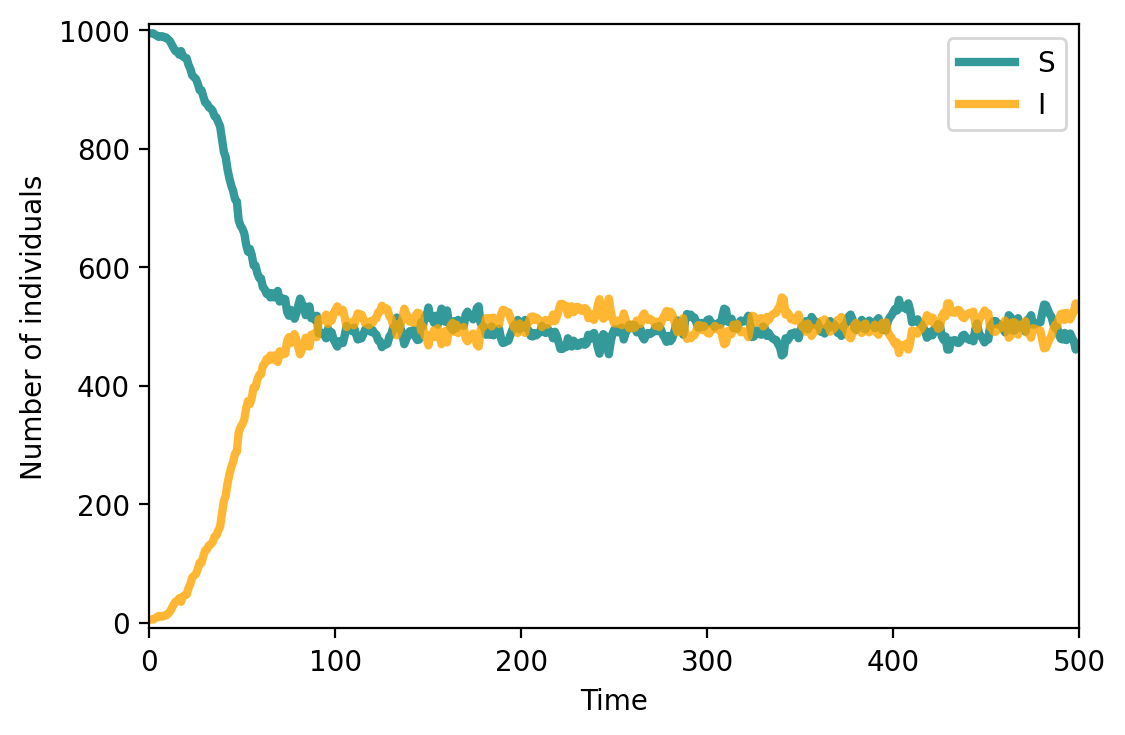

In [68]:
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=200)

ax.plot(range(T), compartments['S'], c="teal", lw=3, alpha=0.8, label = 'S') 
ax.plot(range(T), compartments['I'], c="orange", lw=3, alpha=0.8, label = 'I')
ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_ylim(-10,1010)
ax.set_xlim(0, T)
ax.legend()


plt.show() 

In [69]:
#let's define the model
susceptible_compartment = 'S'
infectious_compartment = 'I'
recovered_compartment = 'R'

compartments = {
                'S':[],
                'I':[],
                'R':[]
                }

transmissions = {
                'S' : ('I', 'contagion', 'beta'),
                'I' : ('R', 'spontaneous', 'mu') 
                }

params = {
         'beta' : 0.2,
         'mu' : 0.1
         }

In [70]:
N = 1000
seed_num = 5
T = 500

# initialize
for cmpt in compartments.keys():
    if cmpt == susceptible_compartment:
        compartments[cmpt].append(N - seed_num)
    elif cmpt == infectious_compartment:
        compartments[cmpt].append(seed_num)
    else:
        compartments[cmpt].append(0)

In [71]:
for t in range(1, T):
    for cmpt in compartments.keys():
        compartments[cmpt].append(compartments[cmpt][t - 1])

    for cmpt_from, (cmpt_to, tr_type, tr_rate_str) in transmissions.items():
        if tr_type == 'contagion':
            prob = params[tr_rate_str] * compartments[cmpt_to][t-1] / float(N)
        else: #for spontaneous transition
            prob = params[tr_rate_str]

        delta = np.random.binomial(compartments[cmpt_from][t-1], prob)

        compartments[cmpt_from][t] -= delta
        compartments[cmpt_to][t] += delta

In [72]:
compartments_sir = compartments.copy()

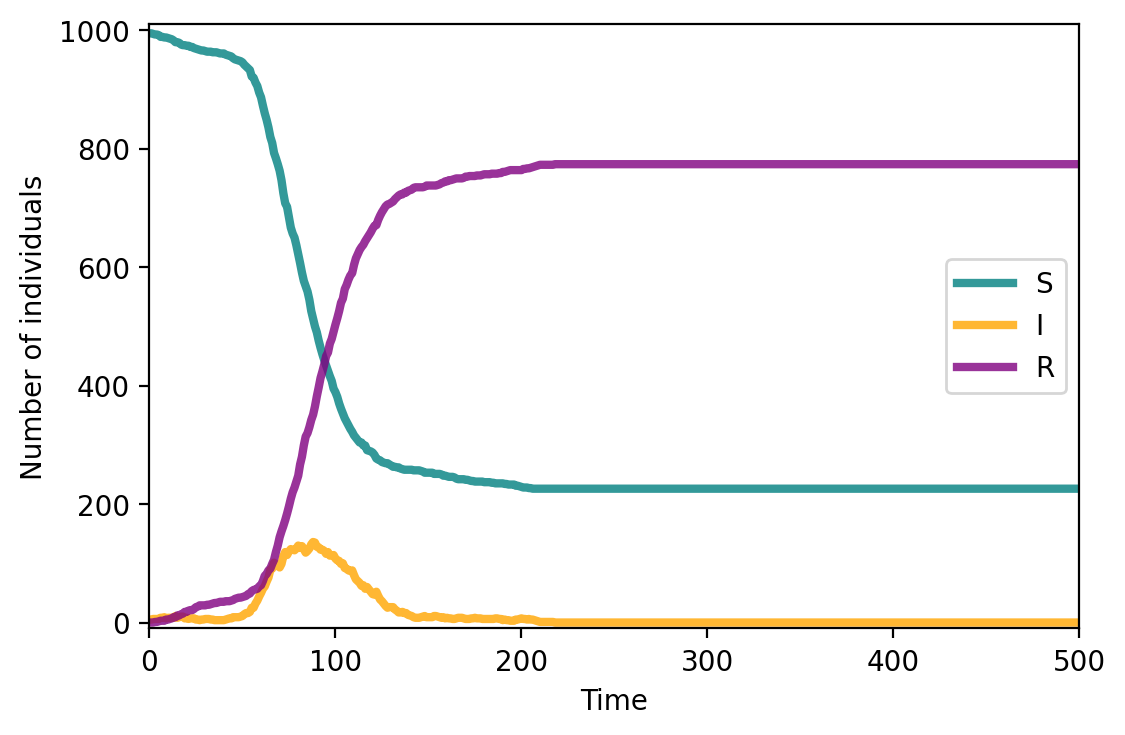

In [73]:
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=200)

ax.plot(range(T), compartments['S'], c="teal", lw=3, alpha=0.8, label = 'S') 
ax.plot(range(T), compartments['I'], c="orange", lw=3, alpha=0.8, label = 'I')
ax.plot(range(T), compartments['R'], c="purple", lw=3, alpha=0.8, label = 'R')
ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_ylim(-10,1010)
ax.set_xlim(0, T)
ax.legend()


plt.show() 

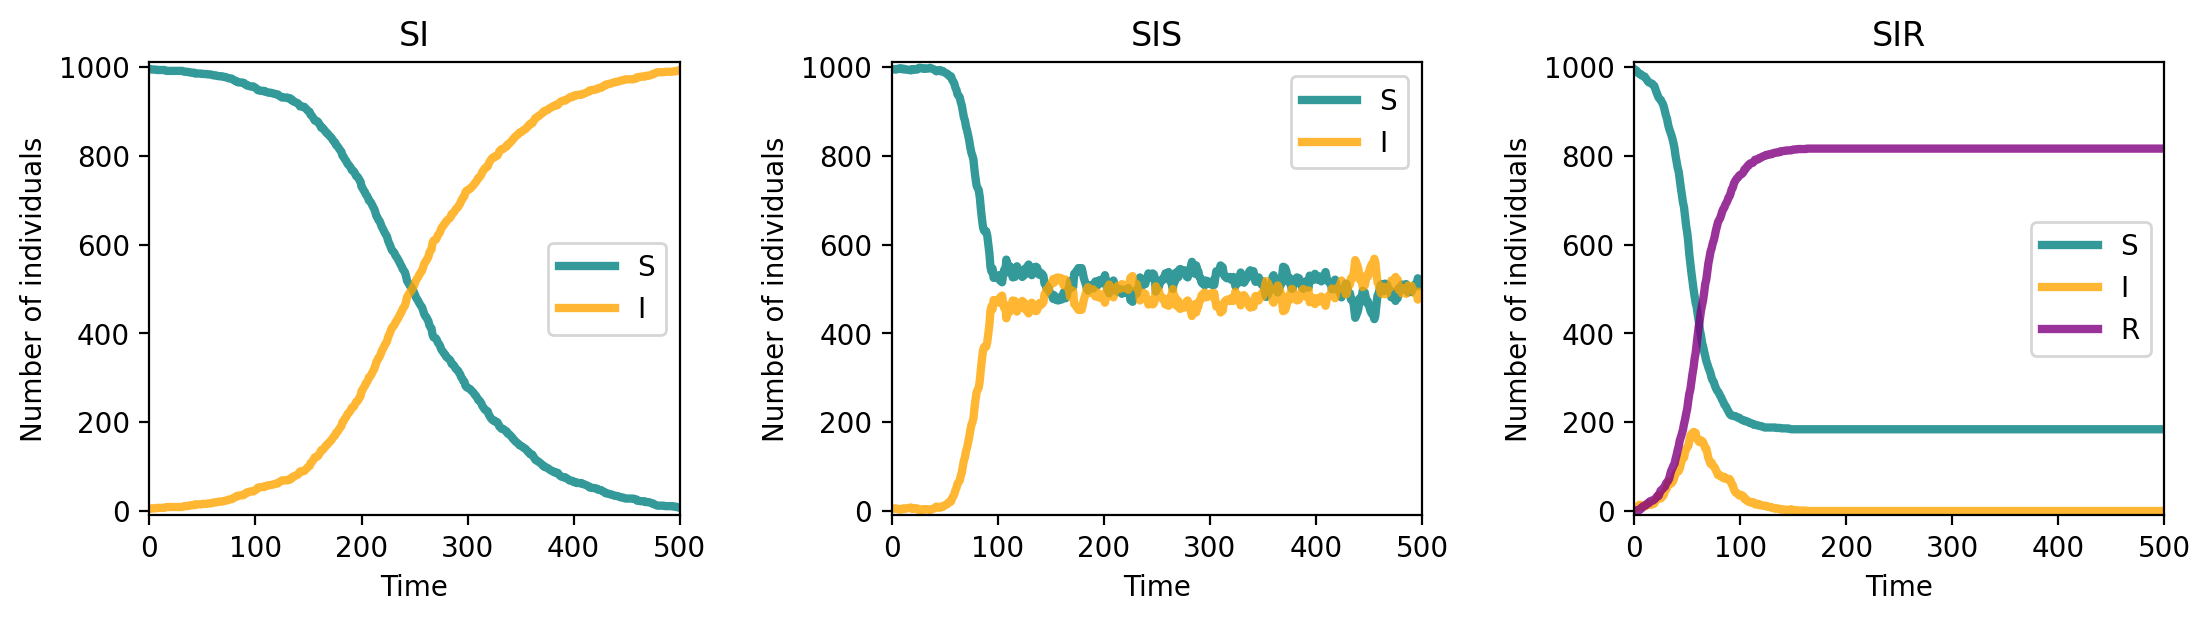

In [17]:
fig, ax = plt.subplots(1,3,figsize=(13,3),dpi=200)
plt.subplots_adjust(wspace=0.4)

model_labels = ['SI','SIS','SIR']
compartment_labels = ['S','I','R']
compartment_colors = ['teal','orange','purple']

for ix,compartments in enumerate([compartments_si, compartments_sis, compartments_sir]):
    for ii,comp in enumerate(list(compartments.keys())):
        ax[ix].plot(range(T), compartments[comp], c=compartment_colors[ii],
                    lw=3, alpha=0.8, label=compartment_labels[ii]) 

    ax[ix].set_xlabel('Time')
    ax[ix].set_ylabel('Number of individuals')
    ax[ix].set_ylim(-10,1010)
    ax[ix].set_xlim(0, T)
    ax[ix].legend()
    ax[ix].set_title(model_labels[ix])


plt.show()

____________
## Epidemic Dynamics on Networks

<!-- 
### SIR model on network

similar arguments to SIS model on hetergeneous networks, but with slightly different solution for the epidemic threshold:

$$R_0 = \frac{\beta}{\mu} > \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$$

# Dynamical Processes on Networks III

# Epidemic Spreading Models (cont.)

## Immunization of heterogeneous networks

* Immunization strategies on networks:
    * to increase the immunization level of populations 
    * to decrease the chances of epidemic outbreaks.

* The weakness of scale-free networks to epidemic attacks

### random immunization (uniform immunization)
* immunize nodes randomly (according to uniform distribution)

* Let $g$ be the density of immune nodes (or probability of a node to be immunized)

* The effective transmission rate $\beta \rightarrow (1-g)\beta$

* $R_0$ now becomes $$R_0 = \frac{\beta}{\mu}(1-g)$$

* Recall, the epidemic threshold $$R_0 > \frac{\langle k \rangle}{\langle k^2 \rangle}$$

* so the __immunization threshold $g_c$__ $$\frac{\beta}{\mu}(1-g_c) = \frac{\langle k \rangle}{\langle k^2 \rangle}$$

* for scale-free networks

    * $\langle k^2 \rangle \rightarrow \infty$
    
    * __only a complete immunization of the network ensures an infection-free stationary state__ in the thermodynamic limit ($g_c = 1$) -->

In [80]:
import networkx as nx
import random

def epidemic_model_network(G, compartments, seed_num, T, transmissions, params):
    """
    Simulate an epidemic model on a networkx graph.

    Parameters:
    -----------
    G : networkx.Graph
        The input graph representing the contact network.
    compartments : dict
        Dictionary where keys are compartment names (e.g., "S", "I", "R") and 
        values are lists to store the number of nodes in each compartment at each timestep.
    seed_num : int
        Number of initial infectious nodes.
    T : int
        Number of timesteps to simulate.
    transmissions : dict
        Dictionary where keys are current statuses (e.g., "S") and values are tuples 
        `(new_status, trans_type, trans_rate_key)`. `trans_type` is either "contagion" 
        or "spontaneous".
    params : dict
        Dictionary mapping parameter names (e.g., "beta", "gamma") to their numerical values.

    Returns:
    --------
    compartments : dict
        Updated dictionary where each key contains a list of counts over time for each compartment.
    """
    # Initialize node states
    all_nodes = list(G.nodes)
    node_status = {node: {"status": None, "next_status": None} for node in all_nodes}

    # Initialize compartments
    for cmpt in compartments.keys():
        compartments[cmpt].append(0)

    # Set all nodes to susceptible initially
    for node in all_nodes:
        node_status[node]["status"] = "S"
        compartments["S"][0] += 1

    # Seed infectious nodes
    seed_nodes = random.sample(all_nodes, seed_num)
    for node in seed_nodes:
        node_status[node]["status"] = "I"
        compartments["S"][0] -= 1
        compartments["I"][0] += 1

    # Simulation loop over timesteps
    for t in range(1, T):
        # Process each node's status
        for node in all_nodes:
            current_status = node_status[node]["status"]
            neighbors = list(G.neighbors(node))
            
            # Check if the current status has a transition rule
            if current_status in transmissions:
                new_status, trans_type, trans_rate_key = transmissions[current_status]
                trans_rate = params[trans_rate_key]

                # Contagion-based transition
                if trans_type == "contagion":
                    for neighbor in neighbors:
                        if node_status[neighbor]["status"] == new_status:
                            if random.uniform(0, 1) < trans_rate:
                                node_status[node]["next_status"] = new_status
                                break

                # Spontaneous transition
                elif trans_type == "spontaneous":
                    if random.uniform(0, 1) < trans_rate:
                        node_status[node]["next_status"] = new_status

        # Update compartments for the current timestep
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)

        # Update node statuses and compartments
        for node in all_nodes:
            if node_status[node]["next_status"]:
                # Update the node's status
                node_status[node]["status"] = node_status[node]["next_status"]
                node_status[node]["next_status"] = None
            
            # Count the node in its current compartment
            compartments[node_status[node]["status"]][t] += 1


    return compartments

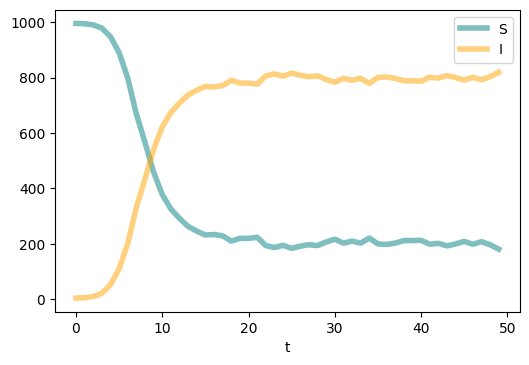

In [88]:
G = nx.barabasi_albert_graph(1000, 2)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('S', 'spontaneous', 'mu') \
                }
params = {
         'beta': 0.2,
         'mu'  : 0.1
         }
compartments = {'S':[],
                'I':[]}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(T), compartments['S'], c='teal',linewidth = 4.0, alpha=0.5, label = 'S') 
plt.plot(range(T), compartments['I'], c='orange',linewidth = 4.0, alpha=0.5, label = 'I') 
plt.xlabel('t')
plt.legend()
plt.show() 

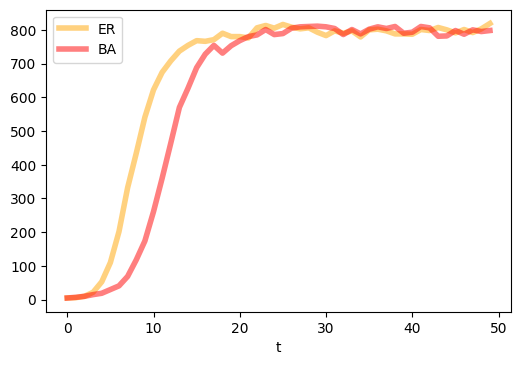

In [89]:
G = nx.erdos_renyi_graph(1000, 4/1000)
compartments_er = {'S':[],
                   'I':[]}

epidemic_model_network(G, compartments_er, seed_num, T, transmissions, params)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(T), compartments['I'], c='orange',linewidth = 4.0, alpha=0.5, label = 'ER') 
plt.plot(range(T), compartments_er['I'], c='red',linewidth = 4.0, alpha=0.5, label = 'BA') 
plt.xlabel('t')
plt.legend()
plt.show() 

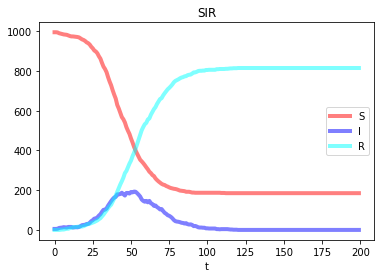

In [90]:
transmissions = {
                'S' : ('I', 'contagion', 'beta'),
                'I' : ('R', 'spontaneous', 'mu') 
                }

params = {\
         'beta' : 0.2,
         'mu'   : 0.1
         }

susceptible_compartment = 'S'
infectious_compartment = 'I'

N = 1000
seed_num = 5
T = 200

compartments = {'S':[],
                'I':[],
                'R':[]}

epidemic_model(N, seed_num, T, compartments, transmissions, params)

plt.plot(range(T), compartments['S'], c="Red",linewidth = 4.0, alpha=0.5, label = 'S') 
plt.plot(range(T), compartments['I'], c="Blue",linewidth = 4.0, alpha=0.5, label = 'I')
plt.plot(range(T), compartments['R'], c="Cyan",linewidth = 4.0, alpha=0.5, label = 'R')
plt.xlabel('t')
plt.legend()
plt.title('SIR')
plt.show() 

In [91]:
params = {\
         'beta' : 0.110,\
          'mu' : 0.1\
         }
N = 1000
seed_num = 5
T = 5000

avg_R_inf = 0
for i in range(100):
    compartments = {'S':[],
                    'I':[],
                    'R':[]}
    epidemic_model(N, seed_num, T, compartments, transmissions, params)

    avg_R_inf += (compartments['R'][-1] / N)
    
print(avg_R_inf/100)

0.12600999999999998


In [92]:
R0 = 1.1
eval("2*(R0-1)/(R0**2)")

0.16528925619834722

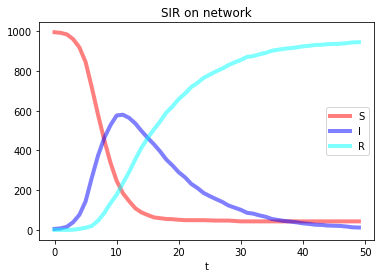

In [93]:
N = 1000
G = nx.barabasi_albert_graph(N, 2)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
params = {\
         'beta': 0.2,\
          'mu' : 0.1
         }
compartments = {'S':[],
                'I':[],
                'R':[]}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

plt.plot(range(T), compartments['S'], c="Red",linewidth = 4.0, alpha=0.5, label = 'S') 
plt.plot(range(T), compartments['I'], c="Blue",linewidth = 4.0, alpha=0.5, label = 'I')
plt.plot(range(T), compartments['R'], c="Cyan",linewidth = 4.0, alpha=0.5, label = 'R')
plt.xlabel('t')
plt.title('SIR on network')
plt.legend()
plt.show() 

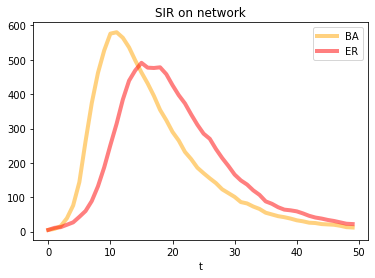

In [95]:
N = 1000
Ger = nx.erdos_renyi_graph(N, 4/N)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
params = {\
         'beta': 0.2,\
          'mu' : 0.1
         }
compartments_er = {'S':[],
                'I':[],
                'R':[]}

epidemic_model_network(Ger, compartments_er, seed_num, T, transmissions, params)

plt.plot(range(T), compartments['I'], c="orange",linewidth = 4.0, alpha=0.5, label = 'BA') 
plt.plot(range(T), compartments_er['I'], c="red",linewidth = 4.0, alpha=0.5, label = 'ER')
plt.xlabel('t')
plt.title('SIR on network')
plt.legend()
plt.show() 

__________
## Next time...
Dynamics on Networks 3 — Agent-Based Models `class_18_dynamics3.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://asmithh.github.io/network-science-data-book/intro.html
    - Github: https://github.com/asmithh/network-science-data-book
    - Syllabus and course details: https://brennanklein.com/phys7332-fall24
2. Dietz, K. & Heesterbeek, J. Bernoulli was ahead of modern epidemiology. *Nature* 408, 513–514 (2000). https://doi.org/10.1038/35046270
3. Bernoulli, D. Mém. Math. Phys. Acad. R. Sci. Paris 1–45 (1766); English translation by Bradley, L. in *Smallpox Inoculation: An Eighteenth Century Mathematical Controversy (Adult Education Department, Nottingham, 1971)*.
4. Anderson, R. M. & May, R. M. Infectious Diseases of Humans — *Dynamics and Control* (Oxford University Press, Oxford, 1991).
5. Dietz, K. *Stat. Meth. Med. Res.* 2, 23–41 (1993).
6. D’Alembert, J. Opuscules Mathématiques, t. II (Paris, David, 1761).
7. Kermack William Ogilvy & McKendrick A.G. (1927). A contribution to the mathematical theory of epidemics. *Proc. R. Soc. Lond.* A115700–721 http://doi.org/10.1098/rspa.1927.0118.
